In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\erica\miniconda3\envs\analisiecg37\python.exe
3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:37:49) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)


In [2]:
from IPython.display import display
import wfdb
#import skfda

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath



## Import signals

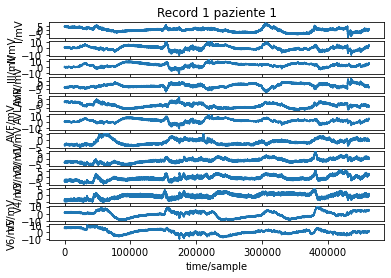

{'record_name': 'I01',
 'n_sig': 12,
 'fs': 257,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 462600,
 'base_time': None,
 'base_date': None,
 'comments': ['<age>: 65 <sex>: F <diagnoses> Coronary artery disease, arterial hypertension',
  'patient 1',
  'PVCs, noise'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'p_signal': array([[ 3.79411765,  1.49346405, -0.30392157, ..., -4.07189542,
          1.65359477,  6.44444444],
        [ 3.75816993,  1.47712418, -0.28431373, ..., -4.05228758,
          1.66013072,  6.44771242],
        [ 3.76470588,  1.49673203, -0.27124183, ..., -4.01633987,
          1.67320261,  6.44771242],
        ...,
        [ 0.54901961,  4.60784314,  6.05555556, ..., -0.29084967,
          4.88562092,  0.61764706],
        [ 0.49673203,  4.59150327,  6.09150327, ..., -0.34313725,
          4.86928105,  0.57843137],
        [ 0.40849673,  4.57189542,  6.16013072, ..., -0.32679739,
    

In [127]:
record = wfdb.rdrecord('I01')
wfdb.plot_wfdb(record=record, title='Record 1 paziente 1') 
display(record.__dict__)

## Obtaining the arrays of the signals and the dictionary of the patient info

In [53]:
# here you get the full sample
signals, fields = wfdb.rdsamp('I06')

# or you can select which channel get the sample form and the sample interval
# signals, fields = wfdb.rdsamp('I01', sampfrom=500, sampto=1000, channels=[1,2,3])

In [3]:
signals.shape

(462600, 12)

In [5]:
type(fields)

dict

In [112]:
index = 0
signals, fields = wfdb.rdsamp(files[index][0:3])
fields["comments"]

['<age>: 65 <sex>: F <diagnoses> Coronary artery disease, arterial hypertension',
 'patient 1',
 'PVCs, noise']

In [27]:
ages = 32*[0]
sexes = 32*[0]

for i in range(32):
    signals, fields = wfdb.rdsamp(files[i][0:3])
    ages[i] = int(fields["comments"][0][7:9])
    sexes[i] = 1 if (fields["comments"][0][17:18] == 'F') else 0

# ages
# sexes

In [114]:
print(diagnoses)

['4', '1', '2', '6', '6', '6', '2', '2', '0', '4', '3', '5', '0', '6', '6', '4', '4', '2', '6', '4', '3', '7', 'Bigeminy', '3', '4', '6', '1', '6', '8', '8', '4', '3']


In [ ]:
# 1 Acute MI	2
# 2 Transient ischemic attack (angina pectoris)	5
# 3 Prior MI	4
# 4 Coronary artery disease with hypertension  	7 (4 with ECGs consistent with left ventricular hypertrophy)
# 5 Sinus node dysfunction	1
# 6 Supraventricular ectopy	18
# 7 Atrial fibrillation or SVTA	3 (2 with paroxysmal AF)
# 8 WPW	2
# 9 AV block	1
# 10 Bundle branch block

In [10]:
files = ["I01 I02", "I03 I04 I05", "I06 I07", "I08", "I09 I10 I11",
         "I12 I13 I14", "I15", "I16 I17", "I18 I19", "I20 I21 I22",
         "I23 I24", "I25 I26", "I27 I28", "I29 I30 I31 I32", "I33 I34",
         "I35 I36 I37", "I38 I39", "I40 I41", "I42 I43", "I44 I45 I46",
         "I47 I48", "I49 I50", "I51 I52 I53", "I54 I55 I56", "I57 I58", 
         "I59 I60 I61", "I62 I63 I64", "I65 I66 I67", "I68 I69", "I70 I71",
         "I72 I73", "I74 I75"]
len(files)

32

In [116]:
print(files)

['I01 I02', 'I03 I04 I05', 'I06 I07', 'I08', 'I09 I10 I11', 'I12 I13 I14', 'I15', 'I16 I17', 'I18 I19', 'I20 I21 I22', 'I23 I24', 'I25 I26', 'I27 I28', 'I29 I30 I31 I32', 'I33 I34', 'I35 I36 I37', 'I38 I39', 'I40 I41', 'I42 I43', 'I44 I45 I46', 'I47 I48', 'I49 I50', 'I51 I52 I53', 'I54 I55 I56', 'I57 I58', 'I59 I60 I61', 'I62 I63 I64', 'I65 I66 I67', 'I68 I69', 'I70 I71', 'I72 I73', 'I74 I75']


# Creating the dataset with patient infos

In [263]:
import pandas as pd

In [265]:
data = {'age':  ages,
        'sex': sexes,
        'diagnosis': diagnoses,
        'signals': files
        }

df = pd.DataFrame(data, index = np.arange(1,33))

In [266]:
print(df)

    age  sex diagnosis          signals
1    65    1         4          I01 I02
2    59    0         1      I03 I04 I05
3    80    0         2          I06 I07
4    51    1         6              I08
5    68    0         6      I09 I10 I11
6    39    1         6      I12 I13 I14
7    57    0         2              I15
8    64    0         2          I16 I17
9    18    1         0          I18 I19
10   59    1         4      I20 I21 I22
11   52    0         3          I23 I24
12   66    1         5          I25 I26
13   60    0         0          I27 I28
14   41    1         6  I29 I30 I31 I32
15   40    0         6          I33 I34
16   38    1         4      I35 I36 I37
17   60    1         4          I38 I39
18   66    0         2          I40 I41
19   19    0         6          I42 I43
20   53    1         4      I44 I45 I46
21   68    1         3          I47 I48
22   70    0         7          I49 I50
23   56    0  Bigeminy      I51 I52 I53
24   74    0         3      I54 I55 I56


In [267]:
df.to_csv(r'PatientsData.csv')

# Importing the dataset

In [268]:
data = pd.read_csv (r'PatientsData.csv')

In [269]:
print(df)

    age  sex diagnosis          signals
1    65    1         4          I01 I02
2    59    0         1      I03 I04 I05
3    80    0         2          I06 I07
4    51    1         6              I08
5    68    0         6      I09 I10 I11
6    39    1         6      I12 I13 I14
7    57    0         2              I15
8    64    0         2          I16 I17
9    18    1         0          I18 I19
10   59    1         4      I20 I21 I22
11   52    0         3          I23 I24
12   66    1         5          I25 I26
13   60    0         0          I27 I28
14   41    1         6  I29 I30 I31 I32
15   40    0         6          I33 I34
16   38    1         4      I35 I36 I37
17   60    1         4          I38 I39
18   66    0         2          I40 I41
19   19    0         6          I42 I43
20   53    1         4      I44 I45 I46
21   68    1         3          I47 I48
22   70    0         7          I49 I50
23   56    0  Bigeminy      I51 I52 I53
24   74    0         3      I54 I55 I56


## Plotting the singals and starting the FDA

In [117]:
# funzione che non mi crea subplots ma solo un plot per channel
def PlotSignals(signals, start, end, channel):
    sample = range(start,end)
    plt.figure(figsize=(12, 8))
    plt.title("Signal %d"%channel)
    plt.xlabel("Sample number")
    plt.ylabel("%d channel"%channel)
    plt.plot(range(start,end), signals[start:end,channel] , color = "black")
    plt.show()

In [120]:
# to get only five minutes of the sample
freq = 257
splsize = freq*60*5
splsize

77100

In [177]:
index = 0
signals, fields = wfdb.rdsamp(files[index][0:3])

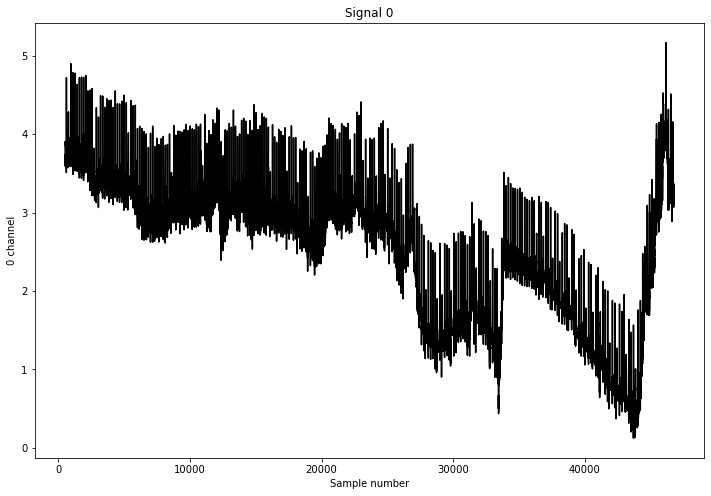

In [152]:
begin = 500
PlotSignals(signals,begin,begin+splsize,0)

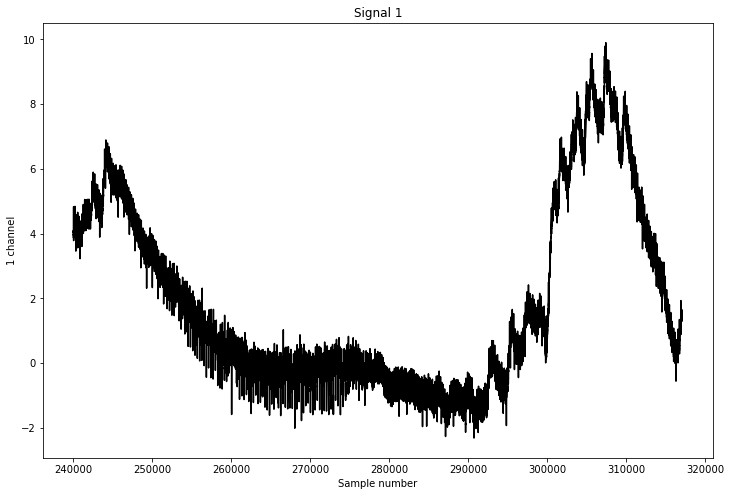

In [126]:
begin = 240000
PlotSignals(signals,begin,begin+splsize,1)

In [128]:
# se invece che 5 minuti ne facessi 3?

freq = 257
splsize = freq*60*3
splsize


46260

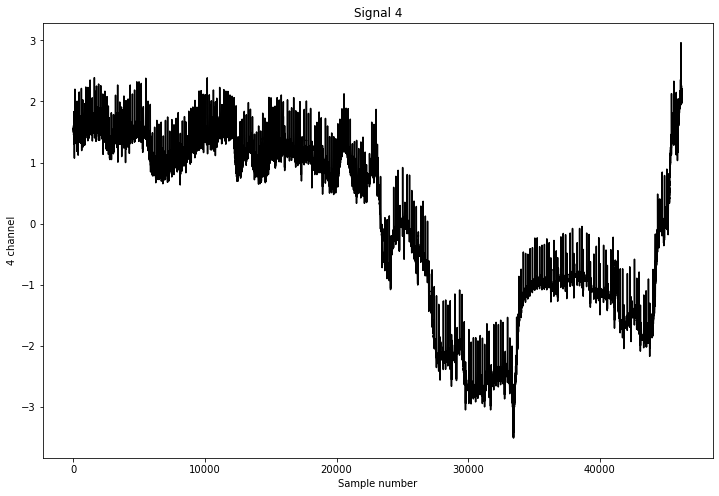

In [134]:
begin = 0
PlotSignals(signals,begin,begin+splsize,4)

# Working with signals

In [234]:
from scipy import signal
from scipy.signal import butter, lfilter, find_peaks

In [168]:
# def butter_bandpass(lowcut, highcut,fs, order):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     return b, a

# def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
#     b, a = butter_bandpass(lowcut, highcut, fs, order)
#     y = lfilter(b, a, data)
#     return y

In [ ]:
index = 0
signals, fields = wfdb.rdsamp(files[index][0:3])

### Band Stop , High Pass and Low Pass Filter 

In [220]:
n = 101;
a = 1;

# channel
ch = 1

ftap = signal.firwin(n,cutoff = [0.007,0.05], window = "hamming");
xf = signal.lfilter(ftap, a, signals[:,ch]);

ftap = signal.firwin(n,cutoff = 0.03, window = "hamming",pass_zero = False);
xf = signal.lfilter(ftap, a, xf);
 
ftap = signal.firwin(n,cutoff = 0.15, window = "hamming");
xf = signal.lfilter(ftap, a, xf);

Volevo provare a lavorare con i picchi ma viene un casino

In [257]:
# peaks_xf,_ = find_peaks(xf, height = 0.5)
# print(len(peaks_xf))

# peaks_xf[0:20]

4092


array([ 155,  185,  225,  266,  428,  466,  594,  739,  758,  851,  868,
       1006, 1092, 1257, 1273, 1319, 1421, 1549, 1583, 1744], dtype=int64)

In [261]:
# mask = np.in1d(peaks_xf, np.arange(start2,end2))
# x = np.ma.masked_array(peaks_xf, mask=mask)

# mask[156]

False

In [256]:
# len(x)

4092

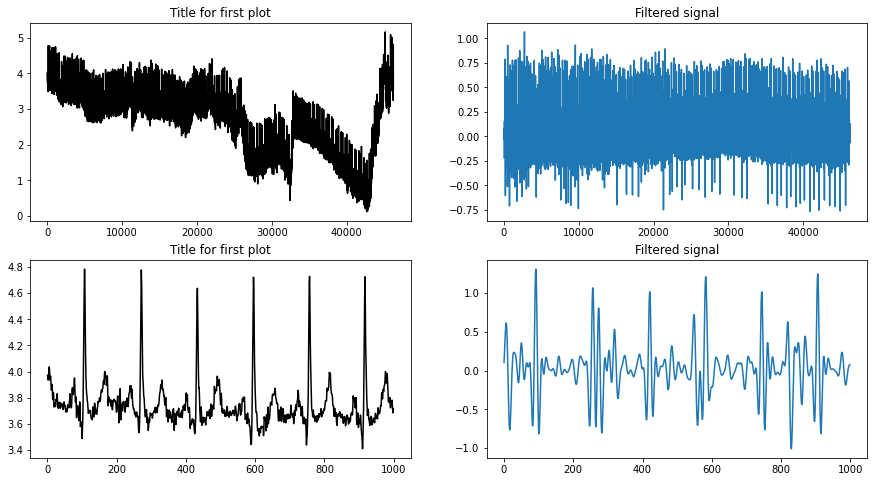

In [232]:
start1 = 1000
end1 = start + splsize

start2 = 1000
end2 = start + 1000

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs[0,0].plot(signals[start1:end1,0] , color = "black")
axs[0,0].set_title("Title for first plot")
axs[0,1].plot(xf_hp[start1:end1])
axs[0,1].plot(peaks_xf,xf_hp)
axs[0,1].set_title('Filtered signal')
axs[1,0].plot(signals[start2:end2,0] , color = "black")
axs[1,0].set_title("Title for first plot")
axs[1,1].plot(xf[start2:end2])
axs[1,1].set_title('Filtered signal')

plt.show()

### High Pass Filter

In [222]:
ftap = signal.firwin(n,cutoff = 0.03, window = "hamming",pass_zero = False);
xf_hp = signal.lfilter(ftap, a, signals[:,ch]);

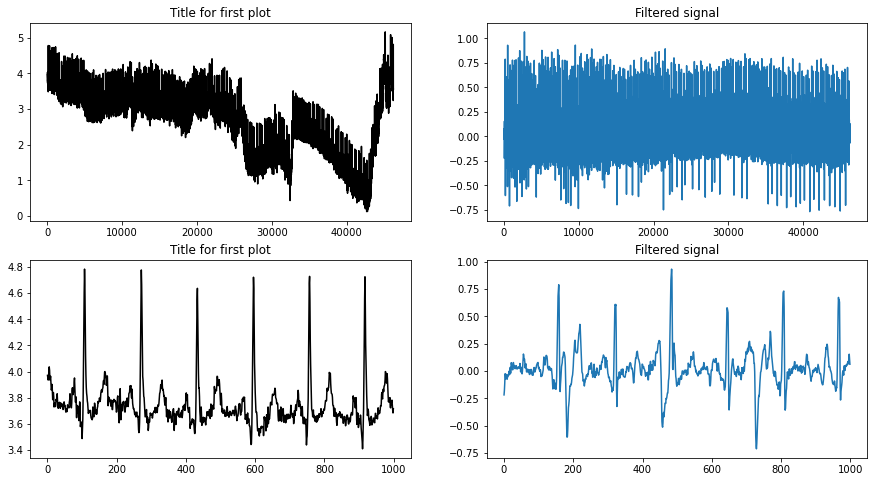

In [231]:
start1 = 1000
end1 = start + splsize

start2 = 1000
end2 = start + 1000

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs[0,0].plot(signals[start1:end1,0] , color = "black")
axs[0,0].set_title("Title for first plot")
axs[0,1].plot(xf_hp[start1:end1])
axs[0,1].set_title('Filtered signal')
axs[1,0].plot(signals[start2:end2,0] , color = "black")
axs[1,0].set_title("Title for first plot")
axs[1,1].plot(xf_hp[start2:end2])
axs[1,1].set_title('Filtered signal')

plt.show()

Forse rimane troppo sporco il segnale, ma almeno viene allineato a 0

### Band Stop Filter

In [228]:
ftap = signal.firwin(n,cutoff = [0.007,0.05], window = "hamming");
xf_bs = signal.lfilter(ftap, a, signals[:,ch]);

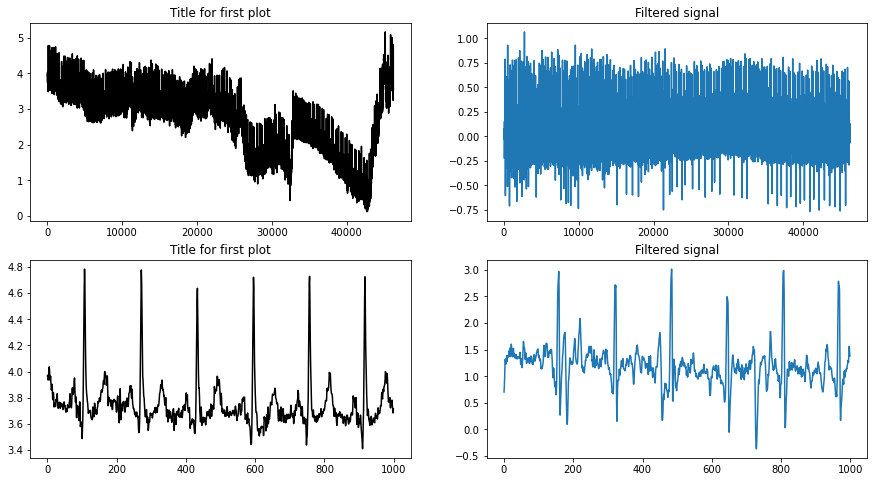

In [230]:
start1 = 1000
end1 = start + splsize

start2 = 1000
end2 = start + 1000

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs[0,0].plot(signals[start1:end1,0] , color = "black")
axs[0,0].set_title("Title for first plot")
axs[0,1].plot(xf_hp[start1:end1])
axs[0,1].set_title('Filtered signal')
axs[1,0].plot(signals[start2:end2,0] , color = "black")
axs[1,0].set_title("Title for first plot")
axs[1,1].plot(xf_bs[start2:end2])
axs[1,1].set_title('Filtered signal')

plt.show()

## Creating the patient dataframe